## Feature Engineering & Preprocessing

In this notebook, we prepare the Telco Customer Churn dataset for machine learning by:
- Separating features and target
- Handling missing values
- Encoding categorical variables
- Scaling numerical features where required
- Creating a reusable preprocessing pipeline


In [314]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

In [315]:
df = pd.read_csv("../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [316]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [317]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [318]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [319]:
df = df.dropna()

Most of the ML models cant work with missing values. It would likely crash or behave incorrectly.To handle missing values we could fill it with 0, or mean(Replace missing with average), or median(Replace missing with middle value), or we could just drop them.Since only a small number of rows have missing total charges we'll drop them.

In [320]:
df["Churn"].value_counts(normalize=True)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

Features with Yes/No value can be binary encoded. 

In [321]:
internet_feature_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

mapping = {
    "No internet service": 0,
    "No": 1,
    "Yes": 2
}

for col in internet_feature_cols:
    df[col] = df[col].replace(mapping).astype(int)


In [322]:
df[internet_feature_cols].info()
df[internet_feature_cols].head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OnlineSecurity    7032 non-null   int64
 1   OnlineBackup      7032 non-null   int64
 2   DeviceProtection  7032 non-null   int64
 3   TechSupport       7032 non-null   int64
 4   StreamingTV       7032 non-null   int64
 5   StreamingMovies   7032 non-null   int64
dtypes: int64(6)
memory usage: 384.6 KB


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,2,1,1,1,1
1,2,1,2,1,1,1
2,2,2,1,1,1,1
3,2,1,2,2,1,1
4,1,1,1,1,1,1


Internet-related service features were encoded into three numerical categories to distinguish between lack of internet service, availability without adoption, and active usage. This preserves service availability information while avoiding unnecessary dimensionality expansion.
{"No internet service" == 0,
    "No" == 1,
    "Yes" == 2}

Internet-related service features are conditionally dependent on InternetService. When no internet service is present, these features uniformly indicate absence. For customers with internet access, the features capture meaningful service adoption behavior. This dependency was preserved during encoding rather than collapsed, allowing models to learn conditional churn effects.

In [323]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

converted target to binary and droped the customer ID column as it has not predictive meaning

In [324]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numerical_cols

(Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
        'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
        'TotalCharges'],
       dtype='object'))

In [325]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
df = df.reset_index(drop=True)
# Save cleaned base dataset
df.to_csv("../../data/processed/telco_clean.csv", index=False)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,1,...,1,1,1,1,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,2,...,2,1,1,1,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,2,...,1,1,1,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,2,...,2,2,1,1,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,1,...,1,1,1,1,Month-to-month,1,Electronic check,70.70,151.65,1


The dataset contains a mix of numerical and categorical features, which must be processed differently before being used by machine learning models.

~Numerical Features
Numerical columns such as `tenure`, `MonthlyCharges`, and `TotalCharges` are scaled using StandardScaler.  
Scaling ensures that all numerical features are on a comparable scale, preventing features with larger magnitudes from dominating the model, especially for models like logistic regression.

~Categorical Features
Categorical columns such as `Contract`, `InternetService`, and `PaymentMethod` are converted into numerical format using One-Hot Encoding.  
One-hot encoding creates a binary column for each category and avoids introducing false ordinal relationships between categories.

#### ColumnTransformer
A `ColumnTransformer` is used to apply the appropriate transformation to each feature type:
- Numerical features → scaling
- Categorical features → one-hot encoding

This approach ensures:
- Consistent preprocessing during training and testing
- No data leakage
- A clean and reusable preprocessing pipeline that can be integrated directly with machine learning models

Overall, this preprocessing step prepares heterogeneous customer data in a form that machine learning algorithms can interpret correctly and fairly.


In [326]:
df = df.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [327]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

In [328]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [329]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7263681592039801
Precision: 0.49093904448105435
Recall: 0.7967914438502673
F1 Score: 0.6075433231396534
ROC AUC: 0.8349635814899751

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



### Baseline Model Performance (Logistic Regression)

The logistic regression model was evaluated on the held-out test set using standard classification metrics.  
Given the class imbalance in churn prediction, recall and F1-score for the churn class are prioritized over raw accuracy.

#### Classification Report Summary

- **Overall Accuracy:** 73%
- **ROC–AUC:** Indicates good class separability (see ROC curve)

#### Class-wise Performance

- **Non-Churn (Class 0):**
  - Precision: **0.91**
  - Recall: **0.70**
  - F1-score: **0.79**

- **Churn (Class 1):**
  - Precision: **0.49**
  - Recall: **0.80**
  - F1-score: **0.61**

#### Key Observations

- The model achieves **high recall (80%) for churned customers**, meaning it successfully identifies most customers who are likely to churn.
- Precision for the churn class is lower (49%), indicating a higher number of false positives, which is acceptable in churn prediction where proactive retention is preferred.
- Non-churn predictions are highly precise, showing the model rarely misclassifies retained customers as churners.
- The weighted F1-score of **0.74** reflects a balanced performance across both classes.

Overall, this baseline model demonstrates a strong ability to detect churn while maintaining reasonable overall accuracy, making it a suitable reference point for further model improvements.


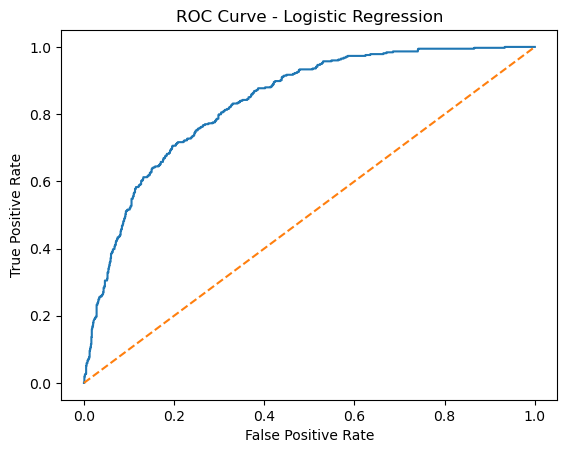

In [330]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()


### ROC Curve Analysis

The Receiver Operating Characteristic (ROC) curve evaluates the model’s ability to distinguish between churned and non-churned customers across different classification thresholds.

#### Key Observations

- The ROC curve lies well above the diagonal baseline, indicating strong discriminative power.
- The model achieves a **high true positive rate at relatively low false positive rates**, showing effective early identification of churners.
- The curve’s shape suggests that meaningful recall can be achieved without excessively increasing false alarms.

#### Interpretation

- A model with no predictive power would follow the diagonal line; the observed curve significantly exceeds this baseline.
- The large area between the ROC curve and the diagonal implies good separability between churn and non-churn classes.
- This confirms that the logistic regression model is able to rank customers by churn risk effectively, even if the final decision threshold is adjusted.

#### Business Implication

- The ROC curve indicates flexibility in choosing operating points depending on business priorities.
- For churn prevention, thresholds can be shifted to favor **higher recall**, allowing the model to flag more at-risk customers while accepting some increase in false positives.

Overall, the ROC analysis validates the baseline model’s ability to distinguish churn behavior and supports its use as a benchmark for comparison with more complex models.
